In [105]:
import pandas as pd
import numpy as np

#Define the path to your CSV file
file_path = 'C:\\Users\\seanm\\Downloads\\car.csv'

# Load dataset (make sure the path to your CSV file is correct)
try:
    df = pd.read_csv('car.csv')
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")

Error loading dataset: [Errno 2] No such file or directory: 'car.csv'


In [107]:
#Inspect The Data
# Display the first few rows of the dataframe
print(df.head())

# Display summary statistics
print(df.describe(include='all'))

# Display data types and missing values
print(df.info())

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   Model Year  US Made  
0          70        1  
1          70        1  
2          70        1  
3          70        1  
4          70        1  
              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000 

In [109]:
#Handle Missing Values
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric, coercing errors to NaN
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
# Check the percentage of missing values
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

# Remove rows with missing values if they are few
df_cleaned = df.dropna()

# Alternatively, fill missing values with mean or median
df_cleaned = df.fillna(df.median())

MPG             0.000000
Cylinders       0.000000
Displacement    0.000000
Horsepower      1.507538
Weight          0.000000
Acceleration    0.000000
Model Year      0.000000
US Made         0.000000
dtype: float64


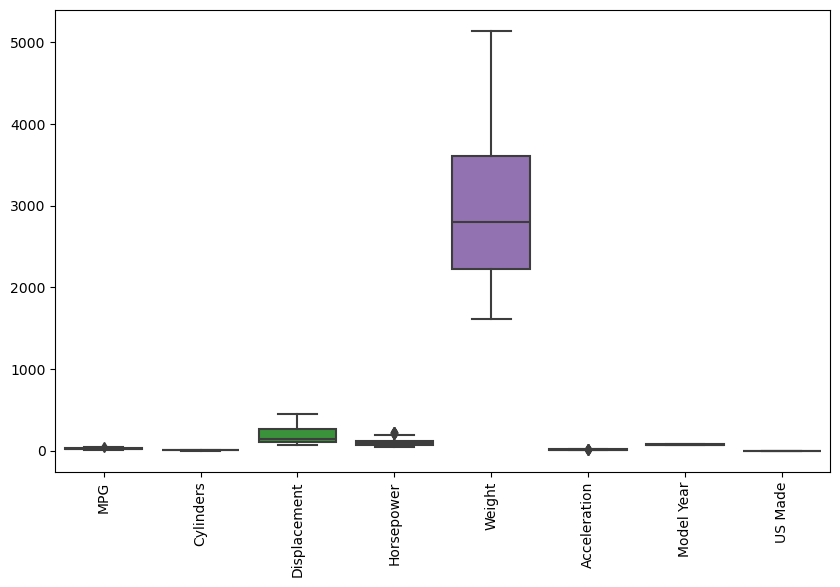

In [111]:
#Handle Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.show()

# Remove outliers if necessary
# Example using z-score method to remove outliers
from scipy import stats

df_cleaned = df_cleaned[(np.abs(stats.zscore(df_cleaned)) < 3).all(axis=1)]

In [113]:
#Encode Categorical Variables
# Get list of categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols)

In [115]:
#Build Linear Regression Model
#Split the Data
from sklearn.model_selection import train_test_split

X = df_cleaned.drop('MPG', axis=1)  # Features
y = df_cleaned['MPG']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
#Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 10.405516679193166
R-squared: 0.8006469540881601


In [119]:
#Identify Significant Attributes
# Get the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

              Coefficient
Cylinders       -0.653491
Displacement     0.024596
Horsepower      -0.023184
Weight          -0.006744
Acceleration    -0.066040
Model Year       0.756969
US Made         -2.607622


In [121]:
#Optimize the Model With 5 Features
#Feature Selection
from sklearn.feature_selection import RFE

# Initialize the model
model = LinearRegression()

# Initialize RFE
selector = RFE(model, n_features_to_select=5)  # Adjust the number of features to select

# Fit the model
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.support_]
print(selected_features)

Index(['Cylinders', 'Horsepower', 'Acceleration', 'Model Year', 'US Made'], dtype='object')


In [123]:
#Rebuild the Model with Selected Features
# Rebuild the model using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = model.predict(X_test_selected)

# Evaluate the model
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f'Selected Features Mean Squared Error: {mse_selected}')
print(f'Selected Features R-squared: {r2_selected}')

Selected Features Mean Squared Error: 14.327218978499852
Selected Features R-squared: 0.7255134145793007


In [125]:
#Interpret Results
# Get the coefficients of the selected features
coefficients_selected = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])
print(coefficients_selected)

              Coefficient
Cylinders       -1.165181
Horsepower      -0.108049
Acceleration    -0.623503
Model Year       0.664062
US Made         -2.996507


In [127]:
#Optimize the Model With 4 Features
#Feature Selection
from sklearn.feature_selection import RFE

# Initialize the model
model = LinearRegression()

# Initialize RFE
selector = RFE(model, n_features_to_select=4)  # Adjust the number of features to select

# Fit the model
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[selector.support_]
print(selected_features)

Index(['Cylinders', 'Acceleration', 'Model Year', 'US Made'], dtype='object')


In [129]:
#Rebuild the Model with Selected Features
# Rebuild the model using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = model.predict(X_test_selected)

# Evaluate the model
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f'Selected Features Mean Squared Error: {mse_selected}')
print(f'Selected Features R-squared: {r2_selected}')

Selected Features Mean Squared Error: 17.937541239975854
Selected Features R-squared: 0.6563454182425374


In [131]:
#Interpret Results
# Get the coefficients of the selected features
coefficients_selected = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])
print(coefficients_selected)

              Coefficient
Cylinders       -2.668053
Acceleration    -0.107450
Model Year       0.758727
US Made         -3.032793


In [163]:
#Selected Features with Variables 'Model Year', 'Acceleration', and 'Displacement'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame and 'mpg' is the target variable
# Select only the specified features
selected_features = ['Model Year', 'Weight', 'Acceleration']

# Create X and y
X = df[selected_features]
y = df['MPG']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])
print(coefficients)

#Evaluate the r2
r2_selected1 = r2_score(y_test, y_pred)
print(f'Selected Features R-squared: {r2_selected}')

Mean Squared Error: 9.410030645590618
              Coefficient
Model Year       0.792474
Weight          -0.006680
Acceleration     0.049261
Selected Features R-squared: 0.6563454182425374


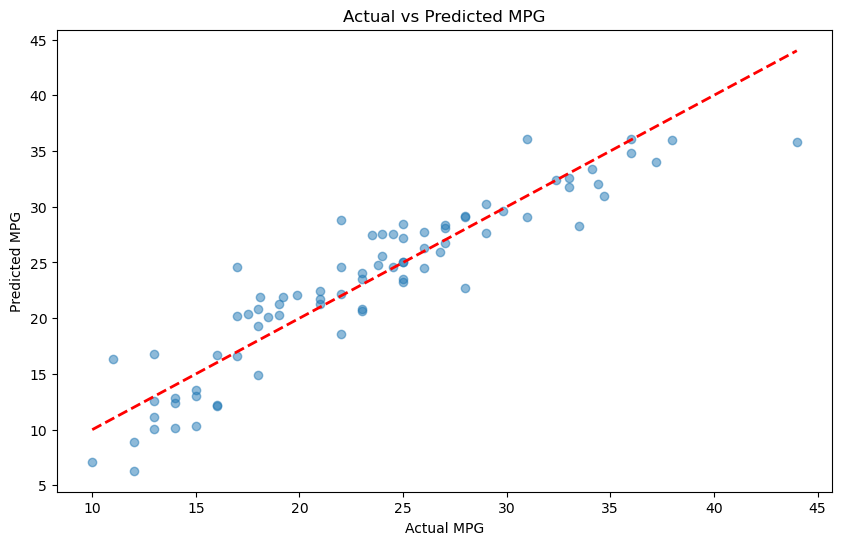

In [45]:
#Scatter Plot with Regression Line
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted MPG values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()

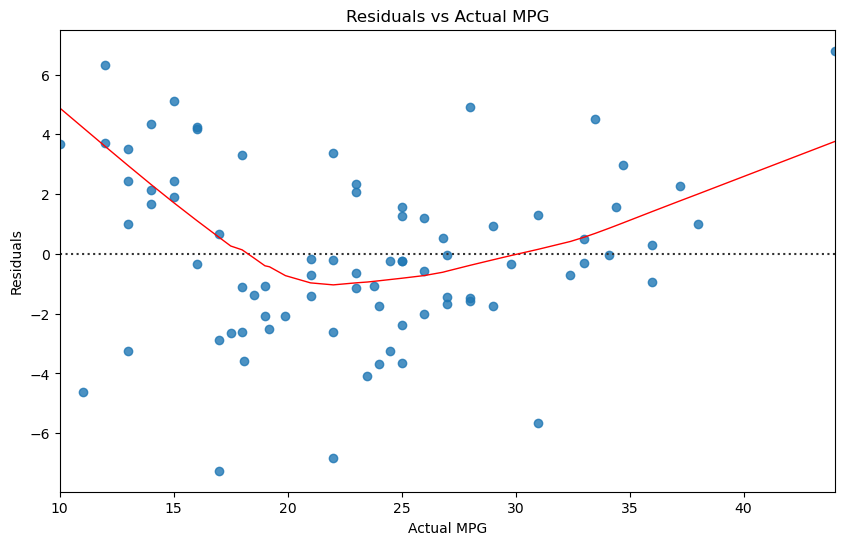

In [47]:
#Creation of a Residual Plot
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Actual MPG')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual MPG')
plt.show()

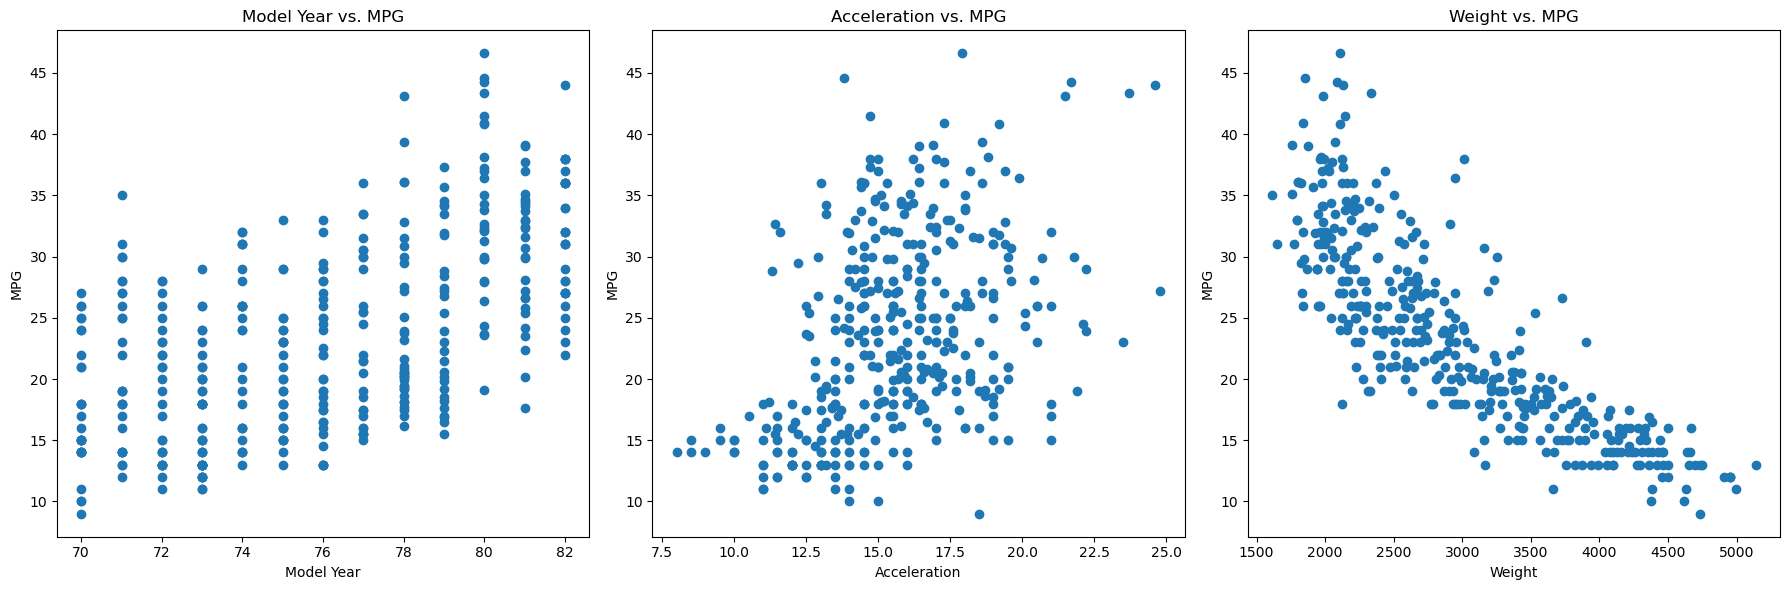

In [165]:
import matplotlib.pyplot as plt

# Plotting individual scatterplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot for Model Year vs. MPG
axs[0].scatter(df['Model Year'], df['MPG'])
axs[0].set_xlabel('Model Year')
axs[0].set_ylabel('MPG')
axs[0].set_title('Model Year vs. MPG')

# Scatterplot for Acceleration vs. MPG
axs[1].scatter(df['Acceleration'], df['MPG'])
axs[1].set_xlabel('Acceleration')
axs[1].set_ylabel('MPG')
axs[1].set_title('Acceleration vs. MPG')

# Scatterplot for Weight vs. MPG
axs[2].scatter(df['Weight'], df['MPG'])
axs[2].set_xlabel('Weight')
axs[2].set_ylabel('MPG')
axs[2].set_title('Weight vs. MPG')

plt.tight_layout()
plt.show()